In [1568]:
import pandas as pd
import datetime
from sklearn.preprocessing import StandardScaler  # Scaling features for regression
import statsmodels.api as sm  # Building and summarizing regression models
from sklearn.preprocessing import StandardScaler  # Scaling features for regression
import matplotlib.pyplot as plt
import seaborn as sns # Advanced data visualizations

In [1569]:
# read prepared data
df_umsatz = pd.read_csv("../0_DataPreparation/Data/model_train_20130701_20180731.csv", parse_dates=['Datum'])
print(df_umsatz.head())

        id      Datum      Umsatz  KielerWoche  weekend_or_holiday  \
0  1307011 2013-07-01  148.828353            0                   0   
1  1307021 2013-07-02  159.793757            0                   0   
2  1307031 2013-07-03  111.885594            0                   0   
3  1307041 2013-07-04  168.864941            0                   0   
4  1307051 2013-07-05  171.280754            0                   0   

   wetter_sonnig  wetter_wolken  wetter_regen  wetter_schnee  wetter_gewitter  \
0              0              1             0              0                0   
1              0              1             0              0                0   
2              0              0             1              0                0   
3              0              1             0              0                0   
4              0              1             0              0                0   

   ...  Monat_May  Monat_November  Monat_October  Monat_September  is_Montag  \
0  ...      

In [1570]:
print(df_umsatz.columns)
# Drop the specified columns
columns_to_drop = ["temp_bin_Kalt", "temp_bin_Moderat", "temp_bin_Warm"]
df_umsatz.drop(columns=columns_to_drop, inplace=True)
print(df_umsatz.columns)

Index(['id', 'Datum', 'Umsatz', 'KielerWoche', 'weekend_or_holiday',
       'wetter_sonnig', 'wetter_wolken', 'wetter_regen', 'wetter_schnee',
       'wetter_gewitter', 'wetter_dunst', 'wetter_nebel', 'temp_bin_Kalt',
       'temp_bin_Moderat', 'temp_bin_Warm', 'is_silvester', 'inflation',
       'Warengruppe_Broetchen', 'Warengruppe_Brot', 'Warengruppe_Croissant',
       'Warengruppe_Konditorei', 'Warengruppe_Kuchen',
       'Warengruppe_Saisonbrot', 'temp_bin_Kalt.1', 'temp_bin_Moderat.1',
       'temp_bin_Warm.1', 'Monat_April', 'Monat_August', 'Monat_December',
       'Monat_February', 'Monat_January', 'Monat_July', 'Monat_June',
       'Monat_March', 'Monat_May', 'Monat_November', 'Monat_October',
       'Monat_September', 'is_Montag', 'is_Dienstag', 'is_Mittwoch',
       'is_Donnerstag', 'is_Freitag', 'is_Samstag'],
      dtype='object')
Index(['id', 'Datum', 'Umsatz', 'KielerWoche', 'weekend_or_holiday',
       'wetter_sonnig', 'wetter_wolken', 'wetter_regen', 'wetter_schnee',
 

In [1571]:
df_umsatz.rename(columns={
    'temp_bin_Kalt.1': 'temp_bin_Kalt',
    'temp_bin_Moderat.1': 'temp_bin_Moderat',
    'temp_bin_Warm.1': 'temp_bin_Warm'
}, inplace=True)
print(df_umsatz.columns)

Index(['id', 'Datum', 'Umsatz', 'KielerWoche', 'weekend_or_holiday',
       'wetter_sonnig', 'wetter_wolken', 'wetter_regen', 'wetter_schnee',
       'wetter_gewitter', 'wetter_dunst', 'wetter_nebel', 'is_silvester',
       'inflation', 'Warengruppe_Broetchen', 'Warengruppe_Brot',
       'Warengruppe_Croissant', 'Warengruppe_Konditorei', 'Warengruppe_Kuchen',
       'Warengruppe_Saisonbrot', 'temp_bin_Kalt', 'temp_bin_Moderat',
       'temp_bin_Warm', 'Monat_April', 'Monat_August', 'Monat_December',
       'Monat_February', 'Monat_January', 'Monat_July', 'Monat_June',
       'Monat_March', 'Monat_May', 'Monat_November', 'Monat_October',
       'Monat_September', 'is_Montag', 'is_Dienstag', 'is_Mittwoch',
       'is_Donnerstag', 'is_Freitag', 'is_Samstag'],
      dtype='object')


In [1572]:
df_umsatz.isna().any()

id                        False
Datum                     False
Umsatz                    False
KielerWoche               False
weekend_or_holiday        False
wetter_sonnig             False
wetter_wolken             False
wetter_regen              False
wetter_schnee             False
wetter_gewitter           False
wetter_dunst              False
wetter_nebel              False
is_silvester              False
inflation                 False
Warengruppe_Broetchen     False
Warengruppe_Brot          False
Warengruppe_Croissant     False
Warengruppe_Konditorei    False
Warengruppe_Kuchen        False
Warengruppe_Saisonbrot    False
temp_bin_Kalt             False
temp_bin_Moderat          False
temp_bin_Warm             False
Monat_April               False
Monat_August              False
Monat_December            False
Monat_February            False
Monat_January             False
Monat_July                False
Monat_June                False
Monat_March               False
Monat_Ma

In [1573]:
# select features
#features = ["wetter_sonnig", "wetter_wolken", "wetter_regen", "wetter_schnee", "wetter_gewitter", "wetter_dunst", "wetter_nebel","weekend_or_holiday", "KielerWoche",	"is_silvester", "temp_bin_Kalt", "temp_bin_Moderat", "temp_bin_Warm", "Warengruppe_Broetchen", "Warengruppe_Brot", "Warengruppe_Croissant", "Warengruppe_Konditorei", "Warengruppe_Kuchen", "Warengruppe_Saisonbrot"]
features = [i for i in df_umsatz.columns if i not in ["id","Datum","Umsatz","Warengruppe","Warengruppe_Saisonbrot","Warengruppe_Kuchen","Warengruppe_Konditorei","Warengruppe_Croissant","Warengruppe_Brot","Warengruppe_Broetchen"]]
X = df_umsatz[features]
Y = df_umsatz["Umsatz"]

# Scale the feature data to standardize the range
scalar = StandardScaler()

# apply standardization of features to umsatz dataframe
standardized_features = pd.DataFrame(scalar.fit_transform(df_umsatz[features].copy()), columns = features)
old_shape = df_umsatz.shape
# drop the unnormalized features from the dataframe
df_umsatz.drop(features, axis = 1, inplace = True)
# join back the normalized features
df_umsatz = pd.concat([df_umsatz, standardized_features], axis= 1)
df_umsatz

,id,Datum,Umsatz,Warengruppe_Broetchen,Warengruppe_Brot,Warengruppe_Croissant,Warengruppe_Konditorei,Warengruppe_Kuchen,Warengruppe_Saisonbrot,KielerWoche,...,Monat_May,Monat_November,Monat_October,Monat_September,is_Montag,is_Dienstag,is_Mittwoch,is_Donnerstag,is_Freitag,is_Samstag
0,1307011,2013-07-01,148.828353,0,1,0,0,0,0,-0.156448,...,-0.292577,-0.323847,-0.301335,-0.294944,2.459644,-0.410313,-0.409778,-0.408350,-0.404234,-0.408707
1,1307021,2013-07-02,159.793757,0,1,0,0,0,0,-0.156448,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,2.437166,-0.409778,-0.408350,-0.404234,-0.408707
2,1307031,2013-07-03,111.885594,0,1,0,0,0,0,-0.156448,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,-0.410313,2.440346,-0.408350,-0.404234,-0.408707
3,1307041,2013-07-04,168.864941,0,1,0,0,0,0,-0.156448,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,-0.410313,-0.409778,2.448878,-0.404234,-0.408707
4,1307051,2013-07-05,171.280754,0,1,0,0,0,0,-0.156448,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,-0.410313,-0.409778,-0.408350,2.473814,-0.408707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9329,1712216,2017-12-21,87.471228,0,0,0,0,0,1,-0.156448,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,-0.410313,-0.409778,2.448878,-0.404234,-0.408707
9330,1712226,2017-12-22,71.911652,0,0,0,0,0,1,-0.156448,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,-0.410313,-0.409778,-0.408350,2.473814,-0.408707
9331,1712236,2017-12-23,84.062223,0,0,0,0,0,1,-0.156448,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,-0.410313,-0.409778,-0.408350,-0.404234,2.446738
9332,1712246,2017-12-24,60.981969,0,0,0,0,0,1,-0.156448,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,-0.410313,-0.409778,-0.408350,-0.404234,-0.408707


In [1574]:
# Convert the 'Datum' column to datetime
df_umsatz['Datum'] = pd.to_datetime(df_umsatz['Datum'])

# Split the DataFrame into two based on the specified date ranges
df_umsatz_train = df_umsatz[df_umsatz['Datum'] <= '2017-07-31']
df_umsatz_test = df_umsatz[(df_umsatz['Datum'] > '2017-07-31') & (df_umsatz['Datum'] <= '2018-07-31')]
df_umsatz_test = df_umsatz_test.reset_index(drop=True)
df_umsatz_train

,id,Datum,Umsatz,Warengruppe_Broetchen,Warengruppe_Brot,Warengruppe_Croissant,Warengruppe_Konditorei,Warengruppe_Kuchen,Warengruppe_Saisonbrot,KielerWoche,...,Monat_May,Monat_November,Monat_October,Monat_September,is_Montag,is_Dienstag,is_Mittwoch,is_Donnerstag,is_Freitag,is_Samstag
0,1307011,2013-07-01,148.828353,0,1,0,0,0,0,-0.156448,...,-0.292577,-0.323847,-0.301335,-0.294944,2.459644,-0.410313,-0.409778,-0.408350,-0.404234,-0.408707
1,1307021,2013-07-02,159.793757,0,1,0,0,0,0,-0.156448,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,2.437166,-0.409778,-0.408350,-0.404234,-0.408707
2,1307031,2013-07-03,111.885594,0,1,0,0,0,0,-0.156448,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,-0.410313,2.440346,-0.408350,-0.404234,-0.408707
3,1307041,2013-07-04,168.864941,0,1,0,0,0,0,-0.156448,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,-0.410313,-0.409778,2.448878,-0.404234,-0.408707
4,1307051,2013-07-05,171.280754,0,1,0,0,0,0,-0.156448,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,-0.410313,-0.409778,-0.408350,2.473814,-0.408707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9273,1612226,2016-12-22,54.322960,0,0,0,0,0,1,-0.156448,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,-0.410313,-0.409778,2.448878,-0.404234,-0.408707
9274,1612236,2016-12-23,133.499200,0,0,0,0,0,1,-0.156448,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,-0.410313,-0.409778,-0.408350,2.473814,-0.408707
9275,1612246,2016-12-24,39.577538,0,0,0,0,0,1,-0.156448,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,-0.410313,-0.409778,-0.408350,-0.404234,2.446738
9276,1612276,2016-12-27,48.890718,0,0,0,0,0,1,-0.156448,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,2.437166,-0.409778,-0.408350,-0.404234,-0.408707


In [1575]:
df_umsatz_test

,id,Datum,Umsatz,Warengruppe_Broetchen,Warengruppe_Brot,Warengruppe_Croissant,Warengruppe_Konditorei,Warengruppe_Kuchen,Warengruppe_Saisonbrot,KielerWoche,...,Monat_May,Monat_November,Monat_October,Monat_September,is_Montag,is_Dienstag,is_Mittwoch,is_Donnerstag,is_Freitag,is_Samstag
0,1708011,2017-08-01,166.135486,0,1,0,0,0,0,-0.156448,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,2.437166,-0.409778,-0.408350,-0.404234,-0.408707
1,1708021,2017-08-02,155.022099,0,1,0,0,0,0,-0.156448,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,-0.410313,2.440346,-0.408350,-0.404234,-0.408707
2,1708031,2017-08-03,159.575340,0,1,0,0,0,0,-0.156448,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,-0.410313,-0.409778,2.448878,-0.404234,-0.408707
3,1708041,2017-08-04,161.585239,0,1,0,0,0,0,-0.156448,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,-0.410313,-0.409778,-0.408350,2.473814,-0.408707
4,1708051,2017-08-05,198.088094,0,1,0,0,0,0,-0.156448,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,-0.410313,-0.409778,-0.408350,-0.404234,2.446738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836,1712216,2017-12-21,87.471228,0,0,0,0,0,1,-0.156448,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,-0.410313,-0.409778,2.448878,-0.404234,-0.408707
1837,1712226,2017-12-22,71.911652,0,0,0,0,0,1,-0.156448,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,-0.410313,-0.409778,-0.408350,2.473814,-0.408707
1838,1712236,2017-12-23,84.062223,0,0,0,0,0,1,-0.156448,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,-0.410313,-0.409778,-0.408350,-0.404234,2.446738
1839,1712246,2017-12-24,60.981969,0,0,0,0,0,1,-0.156448,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,-0.410313,-0.409778,-0.408350,-0.404234,-0.408707


In [1576]:
X_test = sm.add_constant(df_umsatz_test[features], has_constant='add')  # Add constant to test set for predictions
X_test

,const,KielerWoche,weekend_or_holiday,wetter_sonnig,wetter_wolken,wetter_regen,wetter_schnee,wetter_gewitter,wetter_dunst,wetter_nebel,...,Monat_May,Monat_November,Monat_October,Monat_September,is_Montag,is_Dienstag,is_Mittwoch,is_Donnerstag,is_Freitag,is_Samstag
0,1.0,-0.156448,-0.650115,-0.503212,2.020861,-0.858606,-0.167591,-0.132063,-0.452779,-0.128663,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,2.437166,-0.409778,-0.408350,-0.404234,-0.408707
1,1.0,-0.156448,-0.650115,-0.503212,-0.494839,1.164678,-0.167591,-0.132063,-0.452779,-0.128663,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,-0.410313,2.440346,-0.408350,-0.404234,-0.408707
2,1.0,-0.156448,-0.650115,-0.503212,-0.494839,-0.858606,-0.167591,7.572153,-0.452779,-0.128663,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,-0.410313,-0.409778,2.448878,-0.404234,-0.408707
3,1.0,-0.156448,-0.650115,-0.503212,2.020861,-0.858606,-0.167591,-0.132063,-0.452779,-0.128663,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,-0.410313,-0.409778,-0.408350,2.473814,-0.408707
4,1.0,-0.156448,1.538190,-0.503212,2.020861,-0.858606,-0.167591,-0.132063,-0.452779,-0.128663,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,-0.410313,-0.409778,-0.408350,-0.404234,2.446738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836,1.0,-0.156448,-0.650115,-0.503212,2.020861,-0.858606,-0.167591,-0.132063,-0.452779,-0.128663,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,-0.410313,-0.409778,2.448878,-0.404234,-0.408707
1837,1.0,-0.156448,-0.650115,-0.503212,-0.494839,-0.858606,-0.167591,-0.132063,2.208582,-0.128663,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,-0.410313,-0.409778,-0.408350,2.473814,-0.408707
1838,1.0,-0.156448,1.538190,-0.503212,-0.494839,1.164678,-0.167591,-0.132063,-0.452779,-0.128663,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,-0.410313,-0.409778,-0.408350,-0.404234,2.446738
1839,1.0,-0.156448,1.538190,-0.503212,-0.494839,1.164678,-0.167591,-0.132063,-0.452779,-0.128663,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,-0.410313,-0.409778,-0.408350,-0.404234,-0.408707


In [1577]:
X_train = sm.add_constant(df_umsatz_train[features])
X_train

,const,KielerWoche,weekend_or_holiday,wetter_sonnig,wetter_wolken,wetter_regen,wetter_schnee,wetter_gewitter,wetter_dunst,wetter_nebel,...,Monat_May,Monat_November,Monat_October,Monat_September,is_Montag,is_Dienstag,is_Mittwoch,is_Donnerstag,is_Freitag,is_Samstag
0,1.0,-0.156448,-0.650115,-0.503212,2.020861,-0.858606,-0.167591,-0.132063,-0.452779,-0.128663,...,-0.292577,-0.323847,-0.301335,-0.294944,2.459644,-0.410313,-0.409778,-0.408350,-0.404234,-0.408707
1,1.0,-0.156448,-0.650115,-0.503212,2.020861,-0.858606,-0.167591,-0.132063,-0.452779,-0.128663,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,2.437166,-0.409778,-0.408350,-0.404234,-0.408707
2,1.0,-0.156448,-0.650115,-0.503212,-0.494839,1.164678,-0.167591,-0.132063,-0.452779,-0.128663,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,-0.410313,2.440346,-0.408350,-0.404234,-0.408707
3,1.0,-0.156448,-0.650115,-0.503212,2.020861,-0.858606,-0.167591,-0.132063,-0.452779,-0.128663,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,-0.410313,-0.409778,2.448878,-0.404234,-0.408707
4,1.0,-0.156448,-0.650115,-0.503212,2.020861,-0.858606,-0.167591,-0.132063,-0.452779,-0.128663,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,-0.410313,-0.409778,-0.408350,2.473814,-0.408707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9273,1.0,-0.156448,-0.650115,-0.503212,-0.494839,1.164678,-0.167591,-0.132063,-0.452779,-0.128663,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,-0.410313,-0.409778,2.448878,-0.404234,-0.408707
9274,1.0,-0.156448,-0.650115,-0.503212,-0.494839,-0.858606,-0.167591,-0.132063,2.208582,-0.128663,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,-0.410313,-0.409778,-0.408350,2.473814,-0.408707
9275,1.0,-0.156448,1.538190,-0.503212,-0.494839,-0.858606,-0.167591,7.572153,-0.452779,-0.128663,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,-0.410313,-0.409778,-0.408350,-0.404234,2.446738
9276,1.0,-0.156448,-0.650115,1.987234,-0.494839,-0.858606,-0.167591,-0.132063,-0.452779,-0.128663,...,-0.292577,-0.323847,-0.301335,-0.294944,-0.406563,2.437166,-0.409778,-0.408350,-0.404234,-0.408707


In [1578]:
# Train the linear regression model using Statsmodels
model = sm.OLS(df_umsatz_train["Umsatz"], X_train).fit()

# Print the summary of the regression model
# Includes metrics like R-squared, coefficients, and p-values for each feature
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     36.28
Date:                Fri, 03 Jan 2025   Prob (F-statistic):          8.96e-195
Time:                        16:06:23   Log-Likelihood:                -47554.
No. Observations:                7493   AIC:                         9.517e+04
Df Residuals:                    7462   BIC:                         9.538e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                208.4633      1

In [1579]:
# Make predictions on the test set
predictions = model.predict(X_test)
print("Predictions for test data:", predictions)

Predictions for test data: 0       273.940405
1       273.008701
2       276.269517
3       278.466556
4       326.790992
           ...    
1836    140.574293
1837    153.351687
1838    189.351427
1839    196.813773
1840    137.213383
Length: 1841, dtype: float64


In [1580]:
# Calculate Mean Absolute Percentage Error (MAPE) for error evaluation
mape = (abs((df_umsatz_test["Umsatz"] - predictions) / df_umsatz_test["Umsatz"]).mean()) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Percentage Error (MAPE): 74.95%


/tmp/ipykernel_23899/3071136976.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([df_umsatz_test.Umsatz.min(), df_umsatz_test.Umsatz.max()], [df_umsatz_test.Umsatz.min(), df_umsatz_test.Umsatz.max()], 'k--', color="red")


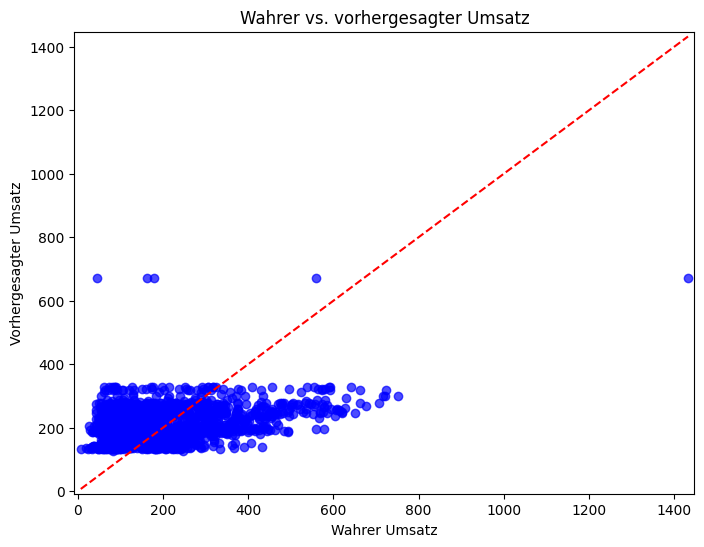

In [1581]:
# Scatter plot: Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(df_umsatz_test.Umsatz, predictions, alpha=0.7, color="blue")
plt.plot([df_umsatz_test.Umsatz.min(), df_umsatz_test.Umsatz.max()], [df_umsatz_test.Umsatz.min(), df_umsatz_test.Umsatz.max()], 'k--', color="red")

plt.xlim([df_umsatz_test.Umsatz.min()-15, df_umsatz_test.Umsatz.max()+15])
plt.ylim([df_umsatz_test.Umsatz.min()-15, df_umsatz_test.Umsatz.max()+15])

plt.xlabel("Wahrer Umsatz")
plt.ylabel("Vorhergesagter Umsatz")
plt.title("Wahrer vs. vorhergesagter Umsatz")
plt.show()

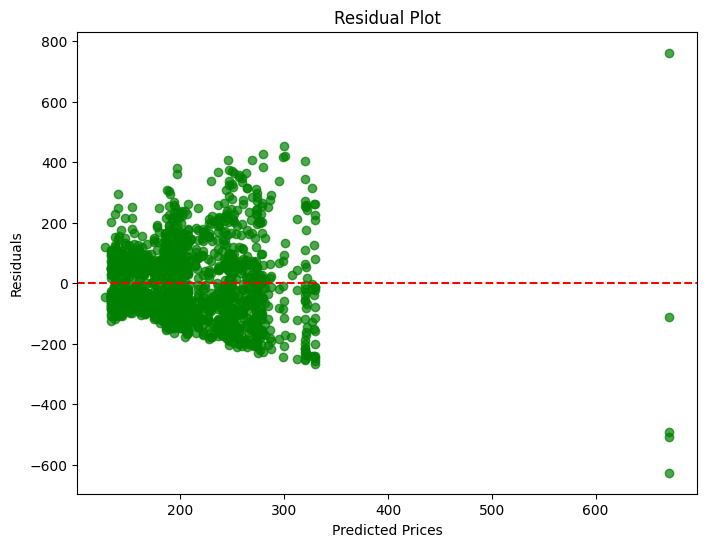

In [1582]:
# Calculate residuals (differences between actual and predicted values)
residuals = df_umsatz_test["Umsatz"] - predictions

# Residual plot: Predicted Prices vs. Residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.7, color="green")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

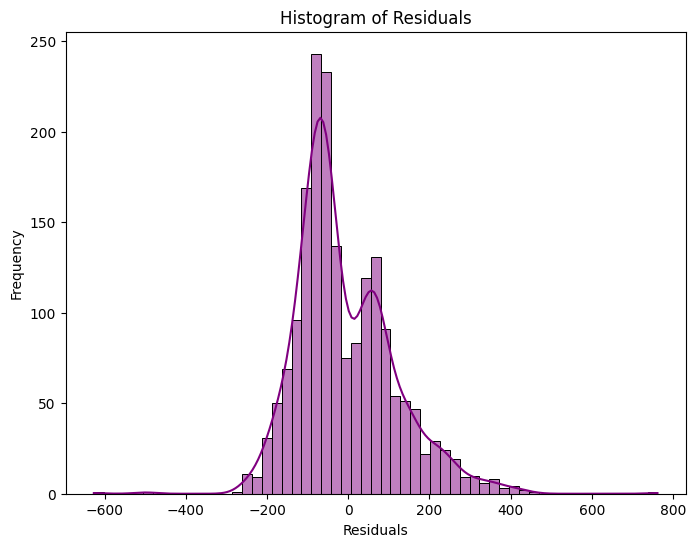

In [1583]:
# Histogram of residuals to check normality
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="purple")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

/tmp/ipykernel_23899/206816024.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="Blues_r")


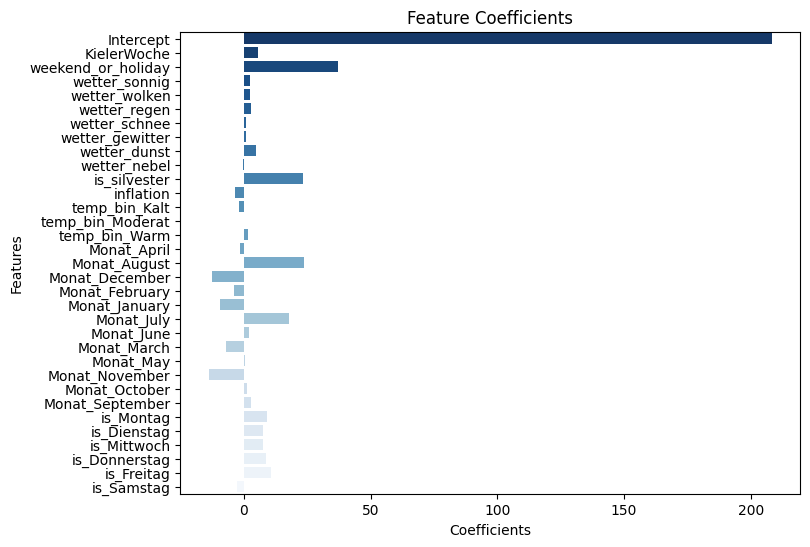

In [1584]:
# Create a DataFrame of model coefficients
coefficients = pd.DataFrame({
    'Feature': ['Intercept'] + features,
    'Coefficient': model.params
})

# Bar plot of feature coefficients
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="Blues_r")
plt.title("Feature Coefficients")
plt.xlabel("Coefficients")
plt.ylabel("Features")
plt.show()

***Experimenting with different Models***

Ridge Regression with Hyperparameter Tuning

In [1585]:
# Import necessary libraries
import pandas as pd  # For data manipulation
from sklearn.model_selection import train_test_split, GridSearchCV  # Train-test split and hyperparameter tuning
from sklearn.linear_model import Ridge  # Ridge Regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Evaluation metrics)

In [1586]:
# Add a constant term to the training data for the regression intercept
X_train = sm.add_constant(df_umsatz_train[features])
y_train = df_umsatz_train["Umsatz"]

# Initialize Ridge Regression model
ridge = Ridge()

# Define hyperparameter grid for alpha (regularization strength)
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100, 200, 300, 315, 350]  # Testing a range of regularization strengths
}

# Create a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=1)

# Train Ridge Regression model using GridSearchCV
grid_search.fit(X_train, y_train)

# Output the best hyperparameters from the grid search
print("Best Hyperparameters:", grid_search.best_params_)

# Retrieve the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
predictions2 = best_model.predict(X_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Hyperparameters: {'alpha': 350}


In [1587]:
# Calculate error metrics
mae = mean_absolute_error(df_umsatz_test["Umsatz"], predictions2)  # Mean Absolute Error
mse = mean_squared_error(df_umsatz_test["Umsatz"], predictions2)  # Mean Squared Error
mape = (abs((df_umsatz_test["Umsatz"] - predictions2) / df_umsatz_test["Umsatz"]).mean()) * 100  # Mean Absolute Percentage Error

# Output evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 97.24
Mean Squared Error (MSE): 14641.55
Mean Absolute Percentage Error (MAPE): 75.24%


/tmp/ipykernel_23899/1494559498.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([df_umsatz_test.Umsatz.min(), df_umsatz_test.Umsatz.max()], [df_umsatz_test.Umsatz.min(), df_umsatz_test.Umsatz.max()], 'k--', color="red")


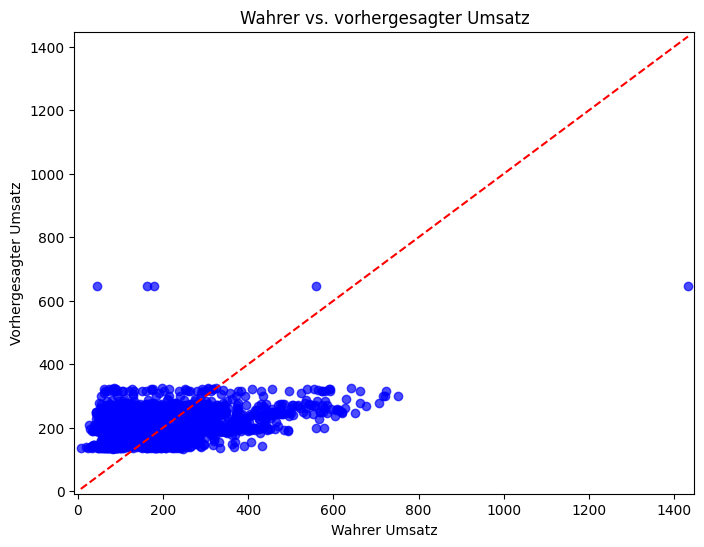

In [1588]:
# Scatter plot: Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(df_umsatz_test.Umsatz, predictions2, alpha=0.7, color="blue")
plt.plot([df_umsatz_test.Umsatz.min(), df_umsatz_test.Umsatz.max()], [df_umsatz_test.Umsatz.min(), df_umsatz_test.Umsatz.max()], 'k--', color="red")

plt.xlim([df_umsatz_test.Umsatz.min()-15, df_umsatz_test.Umsatz.max()+15])
plt.ylim([df_umsatz_test.Umsatz.min()-15, df_umsatz_test.Umsatz.max()+15])

plt.xlabel("Wahrer Umsatz")
plt.ylabel("Vorhergesagter Umsatz")
plt.title("Wahrer vs. vorhergesagter Umsatz")
plt.show()

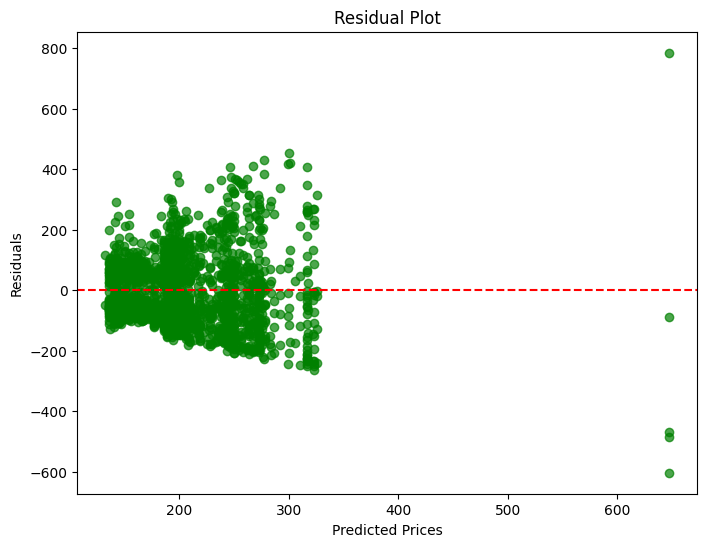

In [1589]:
# Calculate residuals (differences between actual and predicted values)
residuals2 = df_umsatz_test["Umsatz"] - predictions2

# Residual plot: Predicted Prices vs. Residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions2, residuals2, alpha=0.7, color="green")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

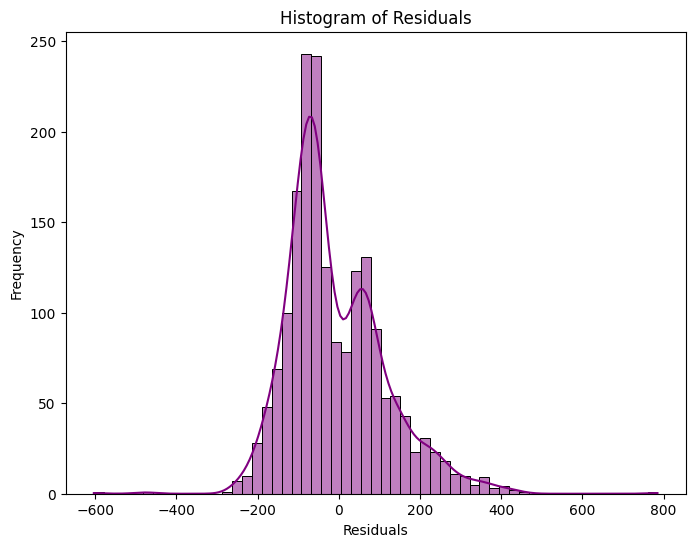

In [1590]:
# Histogram of residuals to check normality
plt.figure(figsize=(8, 6))
sns.histplot(residuals2, kde=True, color="purple")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [1591]:
# Create a DataFrame of model coefficients
#coefficients2 = pd.DataFrame({
 #   'Feature': ['Intercept'] + features,
  #  'Coefficient': best_model.best_params_
#})

# Bar plot of feature coefficients
#plt.figure(figsize=(8, 6))
#sns.barplot(x='Coefficient', y='Feature', data=coefficients2, palette="Blues_r")
#plt.title("Feature Coefficients")
#plt.xlabel("Coefficients")
#plt.ylabel("Features")
#plt.show()

***Experimenting with different Models***

SGD Regressor

In [1592]:
# Import necessary libraries
from sklearn.linear_model import SGDRegressor  # Stochastic Gradient Descent Regressor
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Evaluation metrics
import pandas as pd  # Data manipulation
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns  # Advanced visualizations
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets

In [1593]:
# Train a Stochastic Gradient Descent (SGD) Regressor
# Parameters:
# - max_iter: Maximum number of iterations for training.
# - learning_rate: Type of learning rate schedule ('invscaling' decreases learning rate over time).
# - eta0: Initial learning rate.
sgd_model = SGDRegressor(max_iter=1000, learning_rate='invscaling', eta0=0.01, random_state=42)
sgd_model.fit(X_train, y_train)

# Make predictions on the test set
sgd_predictions = sgd_model.predict(X_test)
print("Predictions for test data:", sgd_predictions[:5])  # Display first 5 predictions

Predictions for test data: [276.71266624 268.40663994 295.56607585 265.1705854  332.3741714 ]


In [1594]:
# Calculate error metrics
mae = mean_absolute_error(df_umsatz_test["Umsatz"], sgd_predictions)  # Mean Absolute Error
mse = mean_squared_error(df_umsatz_test["Umsatz"], sgd_predictions)  # Mean Squared Error
mape = (abs((df_umsatz_test["Umsatz"] - sgd_predictions) / df_umsatz_test["Umsatz"]).mean()) * 100  # Mean Absolute Percentage Error

# Print error metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Error (MAE): 97.91
Mean Squared Error (MSE): 14771.37
Mean Absolute Percentage Error (MAPE): 76.95%


/tmp/ipykernel_23899/2317027441.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([df_umsatz_test["Umsatz"].min(), df_umsatz_test["Umsatz"].max()], [df_umsatz_test["Umsatz"].min(), df_umsatz_test["Umsatz"].max()], 'k--', color="red")


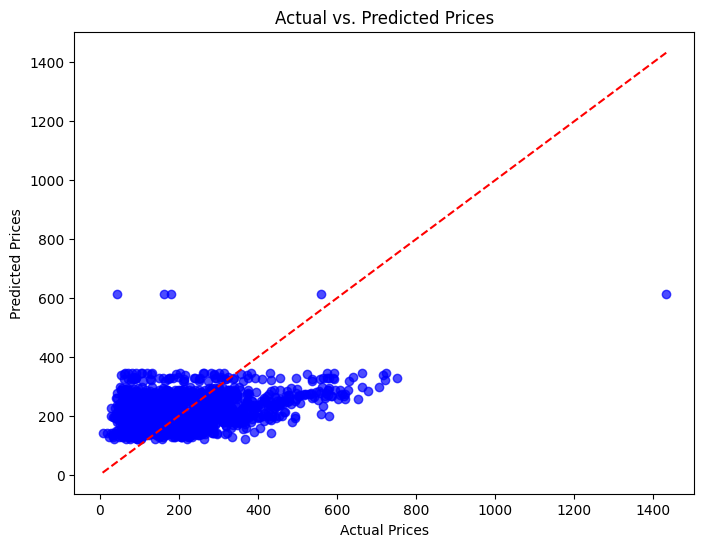

In [1595]:
# Plot: Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(df_umsatz_test["Umsatz"], sgd_predictions, alpha=0.7, color="blue")
plt.plot([df_umsatz_test["Umsatz"].min(), df_umsatz_test["Umsatz"].max()], [df_umsatz_test["Umsatz"].min(), df_umsatz_test["Umsatz"].max()], 'k--', color="red")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()

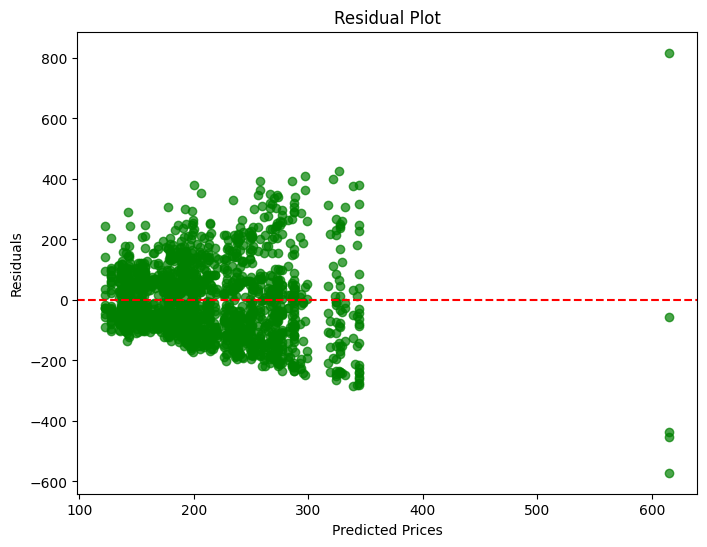

In [1596]:

# Calculate residuals (differences between actual and predicted values)
residuals = df_umsatz_test["Umsatz"] - sgd_predictions

# Residual plot: Predicted Prices vs. Residuals
plt.figure(figsize=(8, 6))
plt.scatter(sgd_predictions, residuals, alpha=0.7, color="green")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

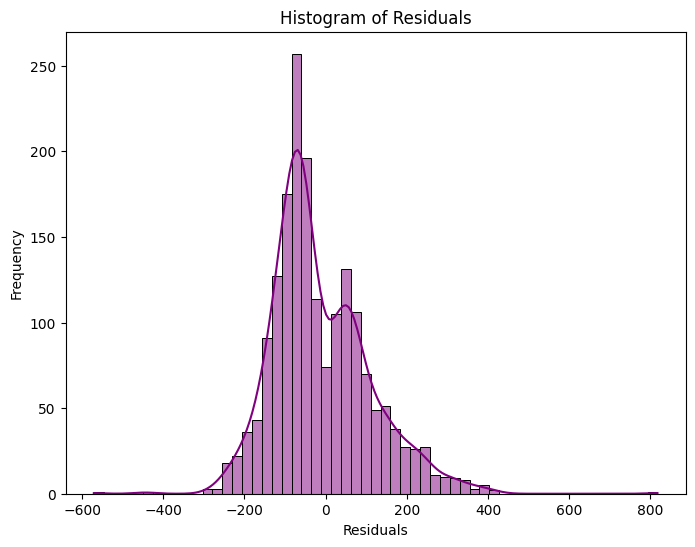

In [1597]:
# Histogram of residuals to check distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="purple")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [1598]:
# Extract and display model coefficients
coefficients = pd.DataFrame({
    'Feature': ['Intercept'] + features,
    'Coefficient': [sgd_model.intercept_[0]] + list(sgd_model.coef_)
})

# Bar plot of feature coefficients
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="Blues_r")
plt.title("Feature Weights")
plt.xlabel("Coefficients")
plt.ylabel("Features")
plt.show()

ValueError: All arrays must be of the same length